## Assignment 1: Confusion Matrix Metrics

1. Generate a confusion matrix as well as accuracy, precision, recall and f1 scores for the model below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("C:/Users/47089/OneDrive/Desktop/marlabs/income.csv")

In [2]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = income_model_prep(income)

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
print('Confusion Matrix:\n', confusion_matrix(y_test, logreg.predict(X_test)))
print('Accuracy: ', logreg.score(X_test, y_test))
print('Precision: ', precision_score(y_test, logreg.predict(X_test)))
print('Recall: ', recall_score(y_test, logreg.predict(X_test)))
print('F1 score: ', f1_score(y_test, logreg.predict(X_test)))

Confusion Matrix:
 [[4534  347]
 [ 587  928]]
Accuracy:  0.8539712320200125
Precision:  0.7278431372549019
Recall:  0.6125412541254125
F1 score:  0.6652329749103942


## Assignment 2: Precision Recall Curve and AUC

1. Plot the precison and recall curves for your model. Plot F1 vs. the Threshold - where is F1 maximized?
2. Report accuracy, precision, recall, and F1 at the threshold determined above.
3. Plot an ROC curve for your model and calculate the AUC score. 

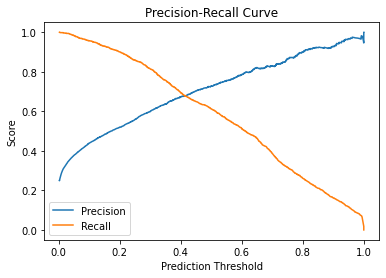

In [6]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

# precision and recall curves:
p_curve, r_curve, t_curve = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

The thresholds for the highest F1 Score:  0.31313131313131315
Accuracy:  0.8322388993120701
Precision:  0.6115035317860746
Recall:  0.8
F1 score:  0.6931655704889905


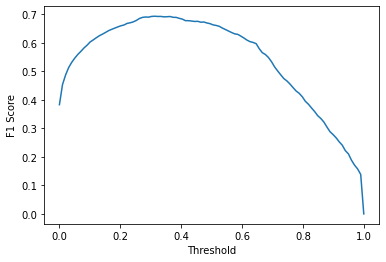

In [7]:
# f1 vs threshold
f1 = []
thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    y_pred = (logreg.predict_proba(X_test)[:,1] > threshold)
    f1.append(f1_score(y_test, y_pred))

plt.figure()
plt.plot(thresholds, f1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

best_threshold = thresholds[np.argmax(f1)]
print('The thresholds for the highest F1 Score: ', best_threshold)

# accuracy, precision, recall, and F1 at the best threshold
y_pred = (logreg.predict_proba(X_test)[:,1] > best_threshold)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

AUC:  0.9068523939056475


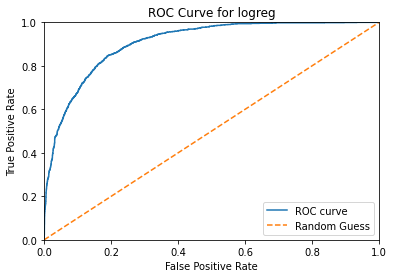

In [8]:
# ROC curve and AUC socre
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print('AUC: ', auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1],  linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logreg')
plt.legend()
plt.show()

## Assignment 3: MultiClass Metrics

1. Calculate precision & recall by class for the fitted model below on your test data
2. Calculate overall accuracy as well as weighted averages for precision & recall on your test data.

In [9]:
import pandas as pd

credit_df = pd.read_csv("C:/Users/47089/OneDrive/Desktop/marlabs/credit_train_clean.csv").drop(["Name", "SSN"], axis=1)

credit_df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [10]:
from sklearn.model_selection import train_test_split

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month"
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True)
y = credit_df["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [14]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6118875
0.60885


In [27]:
y_pred = lr.predict(X_test)
np.unique(y_pred)

array(['Good', 'Poor', 'Standard'], dtype=object)

In [29]:
# Precision and Recall
print('Precision:', precision_score(y_test, y_pred, average=None, labels=['Poor', 'Good', 'Standard']))
print('Recall:', recall_score(y_test, y_pred, average=None, labels=['Poor', 'Good', 'Standard']))

Precision: [0.64818267 0.5049402  0.61109902]
Recall: [0.47841788 0.26987215 0.79569283]


In [31]:
print('Accuracy: ', lr.score(X_test, y_test))
print('Weighted Precision: ', precision_score(y_test,y_pred, average='weighted'))
print('Weighted Recall: ', recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.60885
Weighted Precision:  0.602783118115827
Weighted Recall:  0.60885
